In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("D:\Excel R\Assignments\Assignment 13\Zoo.csv")
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [7]:
x=data.iloc[:,1:17]
y=data.iloc[:,17]

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.1,random_state=0)

# For 3 nearest neighbours:-

In [9]:
neighbours=KNeighborsClassifier(n_neighbors=3)

In [10]:
### Fitting with training data:-
neighbours.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
train_accuracy=np.mean(y_train==neighbours.predict(x_train))
print('Training data prediction accuracy:-',train_accuracy)

Training data prediction accuracy:- 0.9777777777777777


In [14]:
test_accuracy=np.mean(y_test==neighbours.predict(x_test))
print('Test data predict accuracy:',test_accuracy)

Test data predict accuracy: 1.0


# For 5 nearest neighbours:-

In [15]:
neighbours=KNeighborsClassifier(n_neighbors=5)

In [16]:
neighbours.fit(x_train,y_train)

KNeighborsClassifier()

In [17]:
train_accuracy=np.mean(y_train==neighbours.predict(x_train))
print('Training data prediction accuracy:-',train_accuracy)

Training data prediction accuracy:- 0.9333333333333333


In [18]:
test_accuracy=np.mean(y_test==neighbours.predict(x_test))
print('Test data prediction accuracy:-',test_accuracy)

Test data prediction accuracy:- 1.0


# Running KNN algorithm for 1 to 30 nearest neighbours and storing the accuracy values:-

In [20]:
acc=[]
for i in range(1,30):
    neighbours=KNeighborsClassifier(n_neighbors=i)
    neighbours.fit(x_train,y_train)
    train_acc=np.mean(y_train==neighbours.predict(x_train))
    test_acc=np.mean(y_test==neighbours.predict(x_test))
    acc.append([train_acc,test_acc])

Text(0, 0.5, 'Accuracy of the train data')

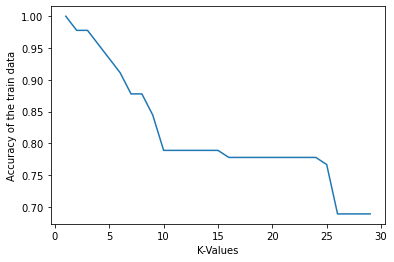

In [23]:
plt.plot(np.arange(1,30),[i[0] for i in acc])
plt.xlabel('K-Values')
plt.ylabel('Accuracy of the train data')

Text(0, 0.5, 'Accuracy of the test data')

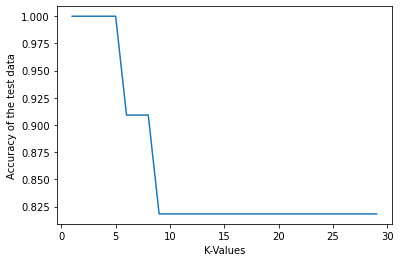

In [24]:
plt.plot(np.arange(1,30),[i[1] for i in acc])
plt.xlabel('K-Values')
plt.ylabel('Accuracy of the test data')

In [25]:
accuracy_df=pd.DataFrame(acc,columns=['Train Accuracy','Test Accuracy'])
accuracy_df

,Train Accuracy,Test Accuracy
0,1.000000,1.000000
1,0.977778,1.000000
2,0.977778,1.000000
3,0.955556,1.000000
4,0.933333,1.000000
5,0.911111,0.909091
6,0.877778,0.909091
7,0.877778,0.909091
8,0.844444,0.818182
9,0.788889,0.818182


In [26]:
accuracy_df['K-Values']=np.arange(1,30)
accuracy_df

,Train Accuracy,Test Accuracy,K-Values
0,1.000000,1.000000,1
1,0.977778,1.000000,2
2,0.977778,1.000000,3
3,0.955556,1.000000,4
4,0.933333,1.000000,5
5,0.911111,0.909091,6
6,0.877778,0.909091,7
7,0.877778,0.909091,8
8,0.844444,0.818182,9
9,0.788889,0.818182,10


### Here, K=6 has the best values of accuracies for both the train and the test data!